Riddler Classic
After a long night of frivolous quackery, two delirious ducks are having a difficult time finding each other in their pond. The pond happens to contain a 3×3 grid of rocks.

Every minute, each duck randomly swims, independently of the other duck, from one rock to a neighboring rock in the 3×3 grid — up, down, left or right, but not diagonally. So if a duck is at the middle rock, it will next swim to one of the four side rocks with probability 1/4. From a side rock, it will swim to one of the two adjacent corner rocks or back to the middle rock, each with probability 1/3. And from a corner rock, it will swim to one of the two adjacent side rocks with probability 1/2.

If the ducks both start at the middle rock, then on average, how long will it take until they’re at the same rock again? (Of course, there’s a 1/4 chance that they’ll swim in the same direction after the first minute, in which case it would only take one minute for them to be at the same rock again. But it could take much longer, if they happen to keep missing each other.)

Extra credit: What if there are three or more ducks? If they all start in the middle rock, on average, how long will it take until they are all at the same rock again?

Given that they both start on the center rock, there are five states that the two ducks can find themselves in:

- A: Adjacent Corners
- B: Opposite Edges
- C: Opposite Corners
- D: Center and Corner
- E: Adjacent Edges
- XYZ: Same Rock

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import fractions
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

First, define the unique states and the possible next states, with probabilities (essentially a transition matrix).

In [13]:
move = {'Start':'A', # It turns out that being in the start position is the same as being in the 'A' position
        'A':lambda: np.random.choice(['Y', 'B', 'E'], p=[1/4, 1/4, 2/4]), 
        'B':lambda: np.random.choice(['Z', 'A', 'C', 'D'], p=[1/9, 2/9, 2/9, 4/9]),
        'C':lambda: np.random.choice(['B', 'E'], p=[2/4, 2/4]),
        'D':lambda: np.random.choice(['Y','B', 'E'], p=[2/8, 2/8, 4/8]),
        'E':lambda: np.random.choice(['X', 'Z', 'A', 'C', 'D'], p=[1/9, 1/9, 2/9, 1/9, 4/9])
        }
# It turns out that being in the start position is the same as being in the 'A' position

Perform simulation to get an estimated value

In [57]:
count = 1000000
run = 0
total_time=[]
while run<count:
    minutes=0
    position='A'
    while position not in ['X', 'Y', 'Z']:
        position=move.get(position)()
        minutes+=1
    total_time.append(minutes)
    run+=1
np.sum(total_time)/count
    

4.912564

Plot histogram of results

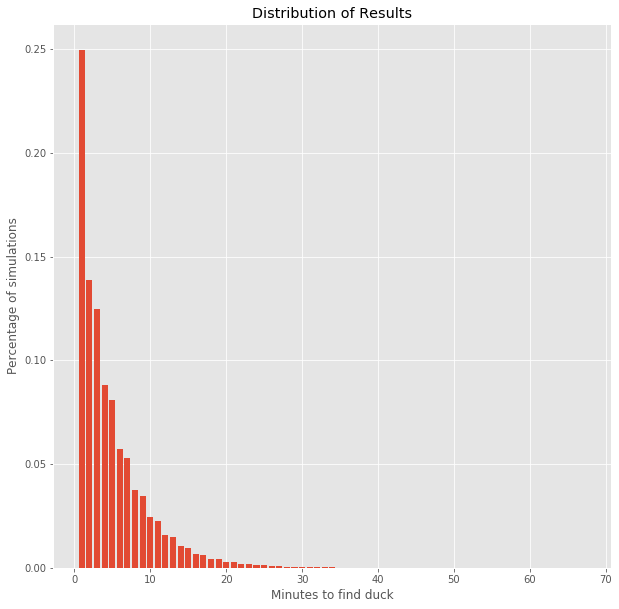

In [75]:
elements, counts = np.unique(total_time,return_counts=True)
counts = np.array(counts)
counts=counts/count
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(elements, counts)
ax.set_title('Distribution of Results')
ax.set_xlabel('Minutes to find duck')
ax.set_ylabel('Percentage of simulations');


Calculate using [absorbing Markov chains](https://en.wikipedia.org/wiki/Absorbing_Markov_chain):

In [60]:
Q = np.array([[0, 1/4, 0, 0, 2/4],
              [2/9, 0, 2/9, 4/9, 0],
              [0, 1/2, 0, 0, 1/2],
              [0, 1/4, 0, 0, 1/2],
              [2/9, 0, 1/9, 4/9, 0]])

In [61]:
I = np.identity(5)

In [62]:
N = np.linalg.inv((I-Q))

In [63]:
Ones = np.ones((5,1))

In [68]:
ans = N@Ones
ans[0]

array([363/74])